In [1]:
!pip install modin[all]

     |████████████████████████████████| 746 kB 5.3 MB/s 
     |████████████████████████████████| 132 kB 42.1 MB/s 
     |████████████████████████████████| 11.3 MB 18.0 MB/s 
     |████████████████████████████████| 1.0 MB 36.3 MB/s 
     |████████████████████████████████| 131 kB 35.8 MB/s 
     |████████████████████████████████| 1.8 MB 37.2 MB/s 
     |████████████████████████████████| 68 kB 6.0 MB/s 
     |████████████████████████████████| 802 kB 43.2 MB/s 
     |████████████████████████████████| 57.6 MB 1.4 MB/s 
     |████████████████████████████████| 117 kB 60.4 MB/s 
     |████████████████████████████████| 9.9 MB 14.1 MB/s 
     |████████████████████████████████| 428 kB 40.3 MB/s 
     |████████████████████████████████| 119 kB 40.6 MB/s 
     |████████████████████████████████| 128 kB 37.9 MB/s 
     |████████████████████████████████| 65 kB 2.9 MB/s 
     |████████████████████████████████| 201 kB 54.7 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 
     |████████████

In [7]:
# Importar librerias
import pandas as pd
import modin.pandas as md
import pyarrow as pa
import pyarrow.parquet as pq
import dask.dataframe as dd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import time
#import sqlite3
#import dask.dataframe as dd
#import pyarrow.dataset as ds

In [8]:
path = '/content/drive/Shareddrives/BigData/Dataset Proyecto/Cryptocurrency/'

In [ ]:
#import ray
#ray.shutdown()
#ray.init()

In [9]:
#Se ingresa las columnas del dataframe. Al interno se transforma a nparray.
def graficar(menossem,media,massem,basecrypto):
  fig = plt.figure()
  fig.set_figwidth(8)
  fig.set_figheight(6)
  plt.plot(np.array(menossem),"purple",label='-sem')
  plt.plot(np.array(media),"blue",label='mean')
  plt.plot(np.array(massem),"green",label='+sem')
  plt.title(label="Variación del percio por dia (sem x100 para visualización) - Crypo="+basecrypto, fontsize = 12).set_color("black")
  plt.ylabel('USD')
  plt.xlabel('Desde 2020-11-28 al 2021-11-23')
  plt.legend(fontsize=10)
  plt.show()

## Usando MODIN

#### Carga de todo el set datos

In [10]:
start = time.time()
#array(['bdada', 'bdavax', 'bdbnb', 'bdbtc', 'bddoge', 'bddot', 'bdeth','bdshib', 'bdsol', 'bdxrp'], dtype=object)
MDFF = md.read_parquet(path + 'crypto_db_full.parquet')
print("Tamanho total de Base RxC:",MDFF.size)
#Convirtiendo a numeros las columnas necesarias.
for c in ['OpenTime','High','Low']:
  MDFF[c] = md.to_numeric(MDFF[c])
end = time.time()
print(end - start)

Tamanho total de Base RxC: 64176931
37.79666781425476


#### Grafica de la evolución en el tiempo de todas las crytomonedas utilizadas en el trbajo.

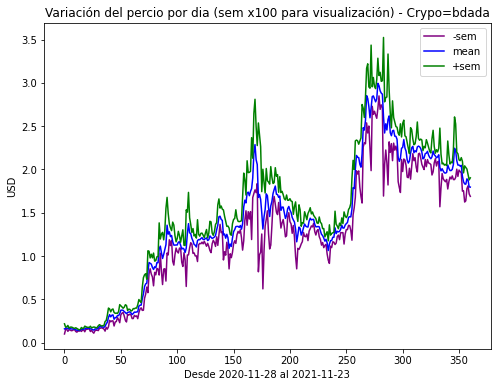

22.919530630111694


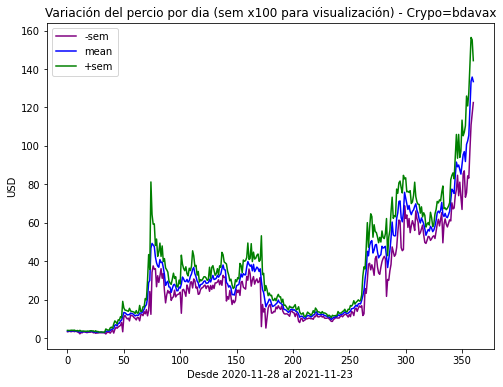

14.398419618606567


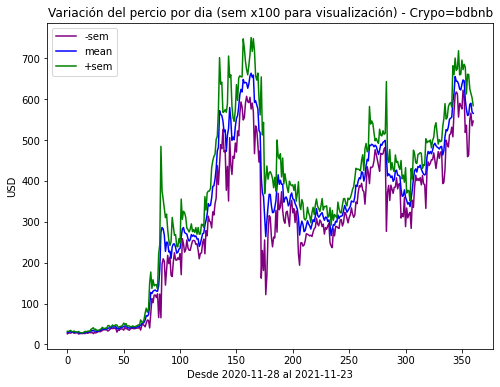

14.118563175201416


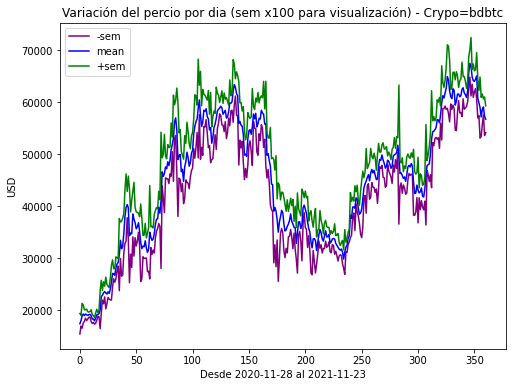

13.285305500030518


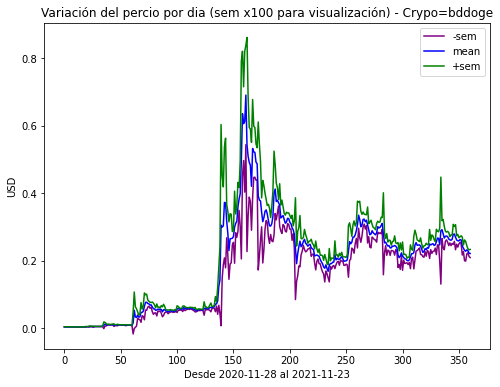

17.794430255889893


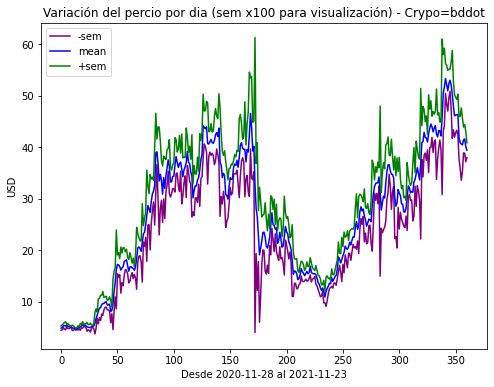

13.42160439491272


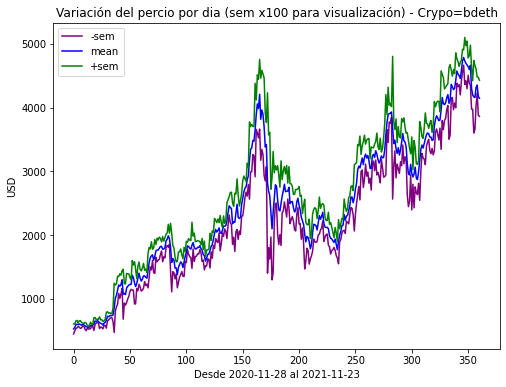

13.52209997177124


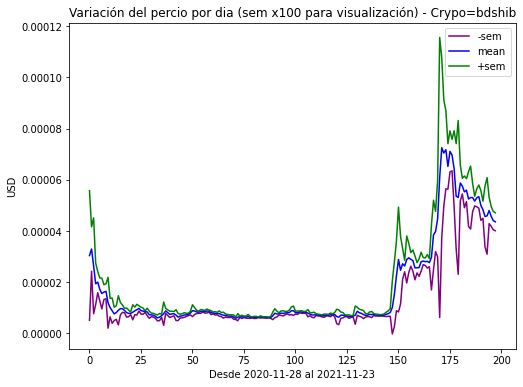

10.661258220672607


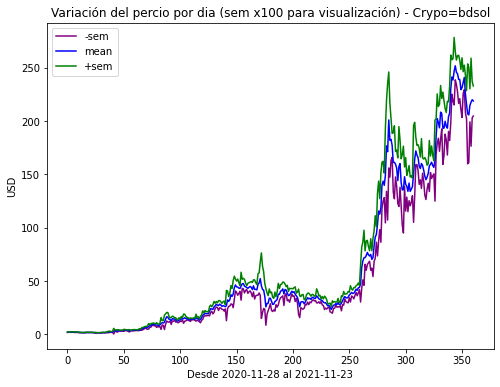

13.41953420639038


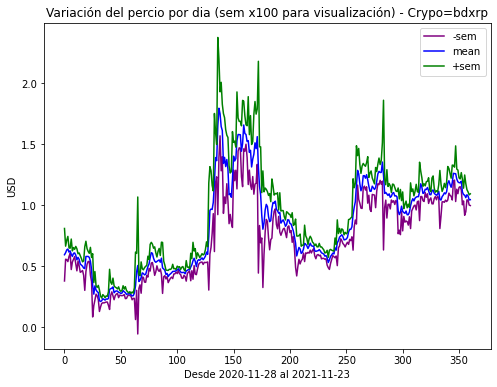

13.73299789428711


In [11]:
lista = ['bdada', 'bdavax', 'bdbnb', 'bdbtc', 'bddoge', 'bddot', 'bdeth','bdshib', 'bdsol', 'bdxrp']
for c in lista:
  start = time.time()
  MDF = MDFF[MDFF['crytodb'] == c]
  MDF['Valor'] = (MDF['High']+MDF['Low'])/2
  MDF['Date'] = pd.to_datetime(np.array(MDF['OpenTime']/1000),unit='s').strftime('%Y-%m-%d')
  MDF_new = MDF.groupby(['Date']).agg({'Valor':['mean','sem']})
  MDF_new.columns = ['Valor_mean','Valor_sem']
  MDF_new['Valor_sem'] = 2*MDF_new['Valor_sem']
  MDF_new['Valor-sem'] = MDF_new['Valor_mean'] - MDF_new['Valor_sem'] *100
  MDF_new['Valor+sem'] = MDF_new['Valor_mean'] + MDF_new['Valor_sem'] *100
  graficar(MDF_new['Valor-sem'],MDF_new['Valor_mean'],MDF_new['Valor+sem'],c)
  end = time.time()
  print(end - start)